In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from ipywidgets import widgets

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
%matplotlib inline

C:\Users\erinm\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
donations=pd.read_pickle('donations_cohort_with_cycle.pkl')

In [20]:
donations.groupby('amount_yr0').agg({'id':'count', 'cohort_1_second_year':'sum'}).sort_index()

,id,cohort_1_second_year
amount_yr0,,
0.01,1,0
0.06,1,0
0.10,3,0
0.20,2,0
0.40,1,0
...,...,...
113360.94,1,1
147548.22,1,1
163192.85,1,1


In [12]:
donations1=donations.groupby('amount_yr0').agg({'id':'count', 'cohort_1_second_year':'sum'}).reset_index()

In [29]:
donations1['perc']=donations1['cohort_1_second_year']/donations1['id']

In [33]:
donations2=donations1.sort_values('perc', ascending=False)

In [48]:
fig = px.histogram(donations1, x="perc",
                   histnorm='probability density',log_y=True
                  )
fig.show()

In [47]:
donations2.query('perc <= .005').sort_values('cohort_1_second_year',ascending=False)

,amount_yr0,id,cohort_1_second_year,perc
46989,679.00,6,0,0.0
8950,93.84,5,0,0.0
9097,95.33,6,0,0.0
9096,95.32,4,0,0.0
9091,95.27,7,0,0.0
...,...,...,...,...
50787,847.15,1,0,0.0
50771,846.41,1,0,0.0
50748,845.25,1,0,0.0
50747,845.22,1,0,0.0


In [38]:
donations2.query('perc == 1').sort_values('cohort_1_second_year',ascending=False)

,amount_yr0,id,cohort_1_second_year,perc
27911,302.34,5,5,1.0
26570,285.79,5,5,1.0
19962,209.50,5,5,1.0
24171,256.50,5,5,1.0
50179,814.00,4,4,1.0
...,...,...,...,...
19416,203.51,1,1,1.0
55073,1134.28,1,1,1.0
55074,1134.31,1,1,1.0
55077,1134.71,1,1,1.0


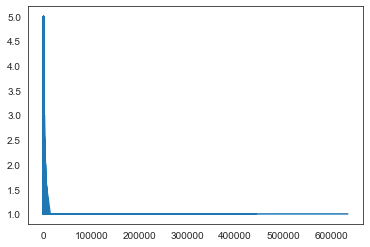

In [42]:
plt.plot(donations2.query('perc == 1').amount_yr0, donations2.query('perc == 1').cohort_1_second_year)

In [43]:
donations2.query('perc > .5').sort_values('cohort_1_second_year',ascending=False)

,amount_yr0,id,cohort_1_second_year,perc
26994,291.00,38,20,0.526316
29453,323.00,35,19,0.542857
30776,341.00,19,13,0.684211
32188,361.00,18,10,0.555556
37333,444.00,16,10,0.625000
...,...,...,...,...
56832,1339.93,1,1,1.000000
56830,1338.92,1,1,1.000000
56681,1316.07,1,1,1.000000
56721,1321.35,1,1,1.000000


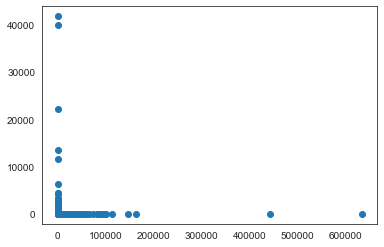

In [16]:
plt.plot(donations1.amount_yr0, donations1.cohort_1_second_year, 'o');

In [19]:
ax=.plot(donations1.amount_yr0, donations1.cohort_1_second_year, 'o');
ax.set_yscale('log')


AttributeError: 'list' object has no attribute 'plot'

In [6]:
arr = donations["amount_yr0"].unique().tolist() 

In [8]:
arr

[50.0,
 99.0,
 10.0,
 25.0,
 100.0,
 99.31,
 450.0,
 195.0,
 267.44,
 20.0,
 23.0,
 760.89,
 125.0,
 300.0,
 28.42,
 40.0,
 15.0,
 200.0,
 998.8,
 150.0,
 2.0,
 227.0,
 274.09,
 238.0,
 44.0,
 38.79,
 1069.0,
 67.81,
 402.4,
 124.0,
 49.19,
 70.0,
 589.34,
 104.36,
 29.17,
 6.0,
 80.0,
 75.0,
 250.0,
 65.0,
 136.54,
 175.0,
 42.79,
 270.0,
 112.64,
 35.67,
 30.0,
 1.0,
 349.0,
 765.56,
 5.0,
 240.0,
 810.0,
 26.48,
 493.91,
 14.0,
 35.0,
 120.06,
 36.0,
 7.0,
 5.91,
 135.0,
 55.0,
 309.62,
 357.0,
 1399.34,
 95.86,
 1516.97,
 18.0,
 12.18,
 54.0,
 68.95,
 51.0,
 54.5,
 209.51,
 60.0,
 559.0,
 2.46,
 279.45,
 135.85,
 156.66,
 165.0,
 93.9,
 120.0,
 1274.47,
 23.52,
 2.42,
 889.0,
 156.0,
 78.41,
 446.21,
 92.42,
 550.0,
 66.0,
 110.0,
 480.0,
 45.0,
 196.86,
 26.98,
 205.0,
 118.0,
 39.99,
 320.6,
 81.86,
 365.0,
 57.5,
 400.0,
 1194.04,
 174.42,
 7.5,
 65.08,
 288.86,
 351.32,
 86.15,
 186.21,
 27.0,
 304.0,
 48.77,
 3756.36,
 43.27,
 109.93,
 7107.25,
 49.99,
 212.15,
 97.44,
 429.76

In [5]:
amountyr0=pd.DataFrame({})

array([  50.  ,   99.  ,   10.  , ..., 6410.15,  843.93,  297.3 ])